In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal

model = Sequential()
model.add(Dense(64, input_dim=100, kernel_initializer=HeNormal()))
model.add(Dense(10, kernel_initializer=HeNormal()))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeUniform

model = Sequential()
model.add(Dense(64, input_dim=100, kernel_initializer=HeUniform()))
model.add(Dense(10, kernel_initializer=HeUniform()))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import GlorotNormal

model = Sequential()
model.add(Dense(64, input_dim=100, kernel_initializer=GlorotNormal()))
model.add(Dense(10, kernel_initializer=GlorotNormal()))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import GlorotUniform

model = Sequential()
model.add(Dense(64, input_dim=100, kernel_initializer=GlorotUniform()))
model.add(Dense(10, kernel_initializer=GlorotUniform()))


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))


데이터 증강(Data Augmentation)은 머신 러닝, 특히 딥 러닝에서 모델의 일반화 능력을 향상시키기 위해 훈련 데이터셋에 다양한 변형을 가하여 새로운 데이터 샘플을 생성하는 기법입니다. 이 기법은 데이터의 양이 적거나 특정 클래스에 대한 데이터가 부족할 때 유용하며, 과적합(overfitting)을 방지하는 데 도움을 줍니다.

### 주요 데이터 증강 기법

다양한 데이터 증강 기법이 있으며, 주로 이미지 데이터에 많이 사용됩니다. 몇 가지 일반적인 기법은 다음과 같습니다:

1. **회전(Rotation)**: 이미지를 임의의 각도로 회전시킵니다.
2. **이동(Translation)**: 이미지를 좌우 또는 상하로 이동시킵니다.
3. **확대/축소(Zooming)**: 이미지를 확대하거나 축소합니다.
4. **좌우 반전(Flipping)**: 이미지를 좌우로 뒤집습니다. 상하 반전도 가능합니다.
5. **잘라내기(Cropping)**: 이미지의 일부를 잘라냅니다.
6. **색상 변환(Color Jittering)**: 밝기, 대비, 채도 등을 임의로 변화시킵니다.
7. **노이즈 추가(Adding Noise)**: 이미지에 임의의 노이즈를 추가합니다.

이 외에도 다양한 방식으로 데이터를 증강할 수 있습니다.

### Keras에서의 데이터 증강

Keras에서는 `ImageDataGenerator` 클래스를 사용하여 이미지 데이터 증강을 간단하게 적용할 수 있습니다. 예를 들어, 다음과 같은 코드로 이미지 데이터를 실시간으로 증강할 수 있습니다:

```python
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 예제 이미지 로드 및 증강
img = ...  # 여기에 이미지 데이터를 불러오는 코드가 들어갑니다.
img = img.reshape((1,) + img.shape)  # (1, height, width, channels)로 reshape

# 증강된 이미지 생성 및 저장
i = 0
for batch in datagen.flow(img, batch_size=1, save_to_dir='preview', save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 20개의 증강된 이미지를 생성하면 종료
```

이 코드는 원본 이미지를 다양한 변형을 통해 새로운 이미지로 증강하며, 'preview' 디렉토리에 저장합니다. `rotation_range`, `width_shift_range`, `height_shift_range` 등은 각각의 증강 기법을 적용하는 범위를 지정합니다.

### 데이터 증강의 장점

- **과적합 방지**: 모델이 훈련 데이터에 과적합되지 않도록 도와줍니다.
- **일반화 성능 향상**: 모델이 다양한 데이터에 대해 보다 일반화된 성능을 발휘할 수 있습니다.
- **데이터 다양성 증가**: 실제 환경에서 나타날 수 있는 다양한 경우에 대응할 수 있도록 데이터 다양성을 높입니다.

데이터 증강은 특히 딥 러닝에서 데이터가 부족하거나 모델의 일반화 능력을 향상시키고자 할 때 매우 유용한 기법입니다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 예제 이미지 로드 및 증강
img = ...  # 여기에 이미지 데이터를 불러오는 코드가 들어갑니다.
img = img.reshape((1,) + img.shape)  # (1, height, width, channels)로 reshape

# 증강된 이미지 생성 및 저장
i = 0
for batch in datagen.flow(img, batch_size=1, save_to_dir='preview', save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 20개의 증강된 이미지를 생성하면 종료

-----

1. 데이터 셋 로드 및 전처리
2. 모델을 정의
3. 모델 컴파일
4. 모델 학습
5. 모델 평가


# 데이터 셋

Fashion MNIST는 의류 이미지로 구성된 데이터셋으로, 10개의 클래스(옷의 종류)로 분류됩니다.   
 Keras에서 제공하는 기본 데이터셋 중 하나

# 라이브러리 import

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 이미지 제너레이터 삽입

In [19]:
datagen = ImageDataGenerator( #제너레이터 정의
    rotation_range = 10,
    width_shift_range = 0.1,
    zoom_range = 0.1

)

In [25]:
import matplotlib.pyplot as plt

In [31]:
x_train_augmented = x_train.reshape(-1, 28,28,1).astype('float32') / 255.0
x_test_augmented = x_test.reshape(-1, 28,28,1).astype('float32') /255.0
datagen.fit(x_train_augmeted) #제너레이터 적용

# 제너레이터된 이미지 확인

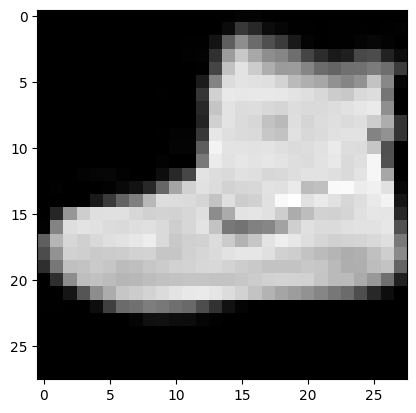

In [32]:
for x_augmented in datagen.flow(x_train_augmented[:1], batch_size=1):
    plt.imshow(x_augmented[0].reshape(28, 28), cmap='gray')
    plt.show()
    break

In [33]:
# 데이터 정규화
x_train, x_test = x_train/ 255.0 ,x_test/255.0


# 모델 정의

In [52]:
from tensorflow.keras import regularizers

In [58]:
from tensorflow.keras.layers import BatchNormalization

In [59]:
model = Sequential([
    layers.Flatten(input_shape=(28,28)), #입력층
    layers.Dense(128, activation = 'relu'), #은닉층
    layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1(0.01)), #은닉층 l1정규화
    layers.Dense(128, activation = 'relu'), #은닉층
    BatchNormalization(),
    layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)), #은닉층 l2정규화
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

----

In [43]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [46]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Best.keras',save_best_only = True)
early_stopping_cb  = keras.callbacks.EarlyStopping(patience=10)

----

In [47]:

model.compile(optimizer=Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [48]:
history = model.fit( datagen.flow(x_train_augmented, y_train, batch_size = 32 ), #제너레이터 로 수정된 부분
                    validation_data = (x_test_augmented, y_test), #제너레이터 로 수정된 부분
                     epochs = 50,
                     callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/50
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 44:42 1s/step - accuracy: 0.7500 - loss: 0.6331

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.7668 - loss: 0.6246 - val_accuracy: 0.7940 - val_loss: 0.5516
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.7712 - loss: 0.6157 - val_accuracy: 0.7937 - val_loss: 0.5476
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7774 - loss: 0.6019 - val_accuracy: 0.8017 - val_loss: 0.5338
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.7796 - loss: 0.5971 - val_accuracy: 0.8014 - val_loss: 0.5315
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.7817 - loss: 0.5920 - val_accuracy: 0.8049 - val_loss: 0.5251
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7839 - loss: 0.5845 - val_accuracy: 0.8070 - val_loss: 0.5174
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7872 - loss: 0.5786 - val_accuracy: 0.8116 - val_loss: 0.5137
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7916 - loss: 0.57

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.3391


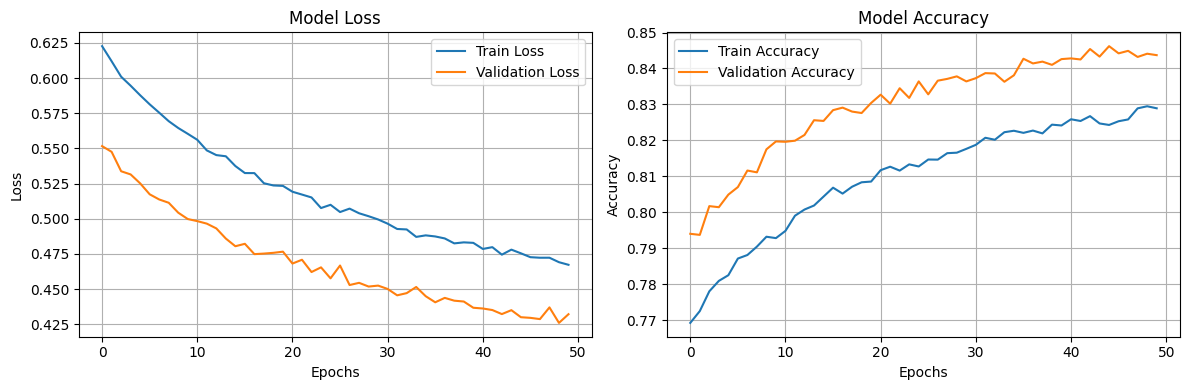

In [49]:
import matplotlib.pyplot as plt

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 학습 및 검증 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
